In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 50}
matplotlib.rc('font', **font)

In [233]:
def plot_single(df, ql, delay, attr, all_nflows, ncolors=None,
                    unit='us', ax=None, show=False, mlabel=None,
                    xlower=None, xupper=None, ylower=None, yupper=None, 
                    linewidth=1, linestyle="--", markersize=20, marker='.', mew=1, alpha=1, flowtype="",
                    vlx=None, vshadecolor="black", vshadealpha=0.05, pcolor=None,
                    vlx2=None, vshadecolor2="orange", vshadealpha2=0.05, logy=False, color=None):
    if color == None:
        if pcolor:
            sns.set_palette(sns.color_palette(pcolor))
        else:
            sns.set_palette(sns.color_palette("husl", ncolors if ncolors != None else len(all_nflows)))
    sdf = df[(df['ql']==ql)&(df['delay']==delay)]
    if ylower is None: 
        strlower = str(int(min(sdf[attr])))
        ylower = 0 if len(strlower)<=1 else (int(strlower[0:2]))*10**(len(strlower)-2)
    if yupper is None:
        strupper = str(int(max(sdf[attr])))
        yupper = (int(strupper[0])+1) if len(strupper)<=1 else (int(strupper[0:2])+1)*10**(len(strupper)-2)
    if xlower is None: 
        strlower = str(int(min(sdf['srp'])))
        xlower = 0 if len(strlower)<=1 else (int(strlower[0:2]))*10**(len(strlower)-2)
    if xupper is None:
        strupper = str(int(max(sdf['srp'])))
        xupper = (int(strupper[0])+1) if len(strupper)<=1 else (int(strupper[0:2])+1)*10**(len(strupper)-2)
    for n in all_nflows:
        msdf = sdf[sdf['nflows']==n]
        ax = msdf.plot(ax=ax, x='srp', y=attr, 
                             title='', 
                             linewidth=linewidth, linestyle=linestyle, marker=marker, markersize=markersize,
                             markeredgewidth=mew, markeredgecolor=(0.1, 0.1, 0.1, 0.2),
                             xlim=(xlower, xupper), logx=True, ylim=(ylower, yupper), logy=logy, 
                             alpha=alpha, figsize=(18,12), color=color,
                             label=mlabel if mlabel else (str(n)+flowtype+' flow'+('s' if n!=1 else "")))
        ax.get_legend().remove()
        ax.grid(True, which='minor', axis='x', linestyle='dotted')
        ax.grid(True, which='major', axis='x', linestyle='dotted')
        ax.grid(True, which='minor', axis='y', linestyle='dotted')
        ax.grid(True, which='major', axis='y', linestyle='dotted')
        ax.set_xlabel('SRP (ms)')
        ax.set_ylabel('{:s}{:s}'.format(attr,'' if unit is None else ' ('+unit+')'))
        
        ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.1f'))
        
        if logy:
            ax.yaxis.set_minor_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
            ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
        else:
            ax.ticklabel_format(style='plain', axis='y')
        
        if vlx:
            ax.axvline(x=vlx,ymin=0,ymax=60,c="black",linewidth=2,zorder=0)
            ax.axvspan(0, vlx, alpha=vshadealpha, color=vshadecolor)
            if vlx2: 
                ax.axvline(x=vlx2,ymin=0,ymax=60,c="black",linewidth=2,zorder=0)
                ax.axvspan(vlx, vlx2, alpha=vshadealpha2, color=vshadecolor2)
    if show:
        plt.show()
    else:
        return ax

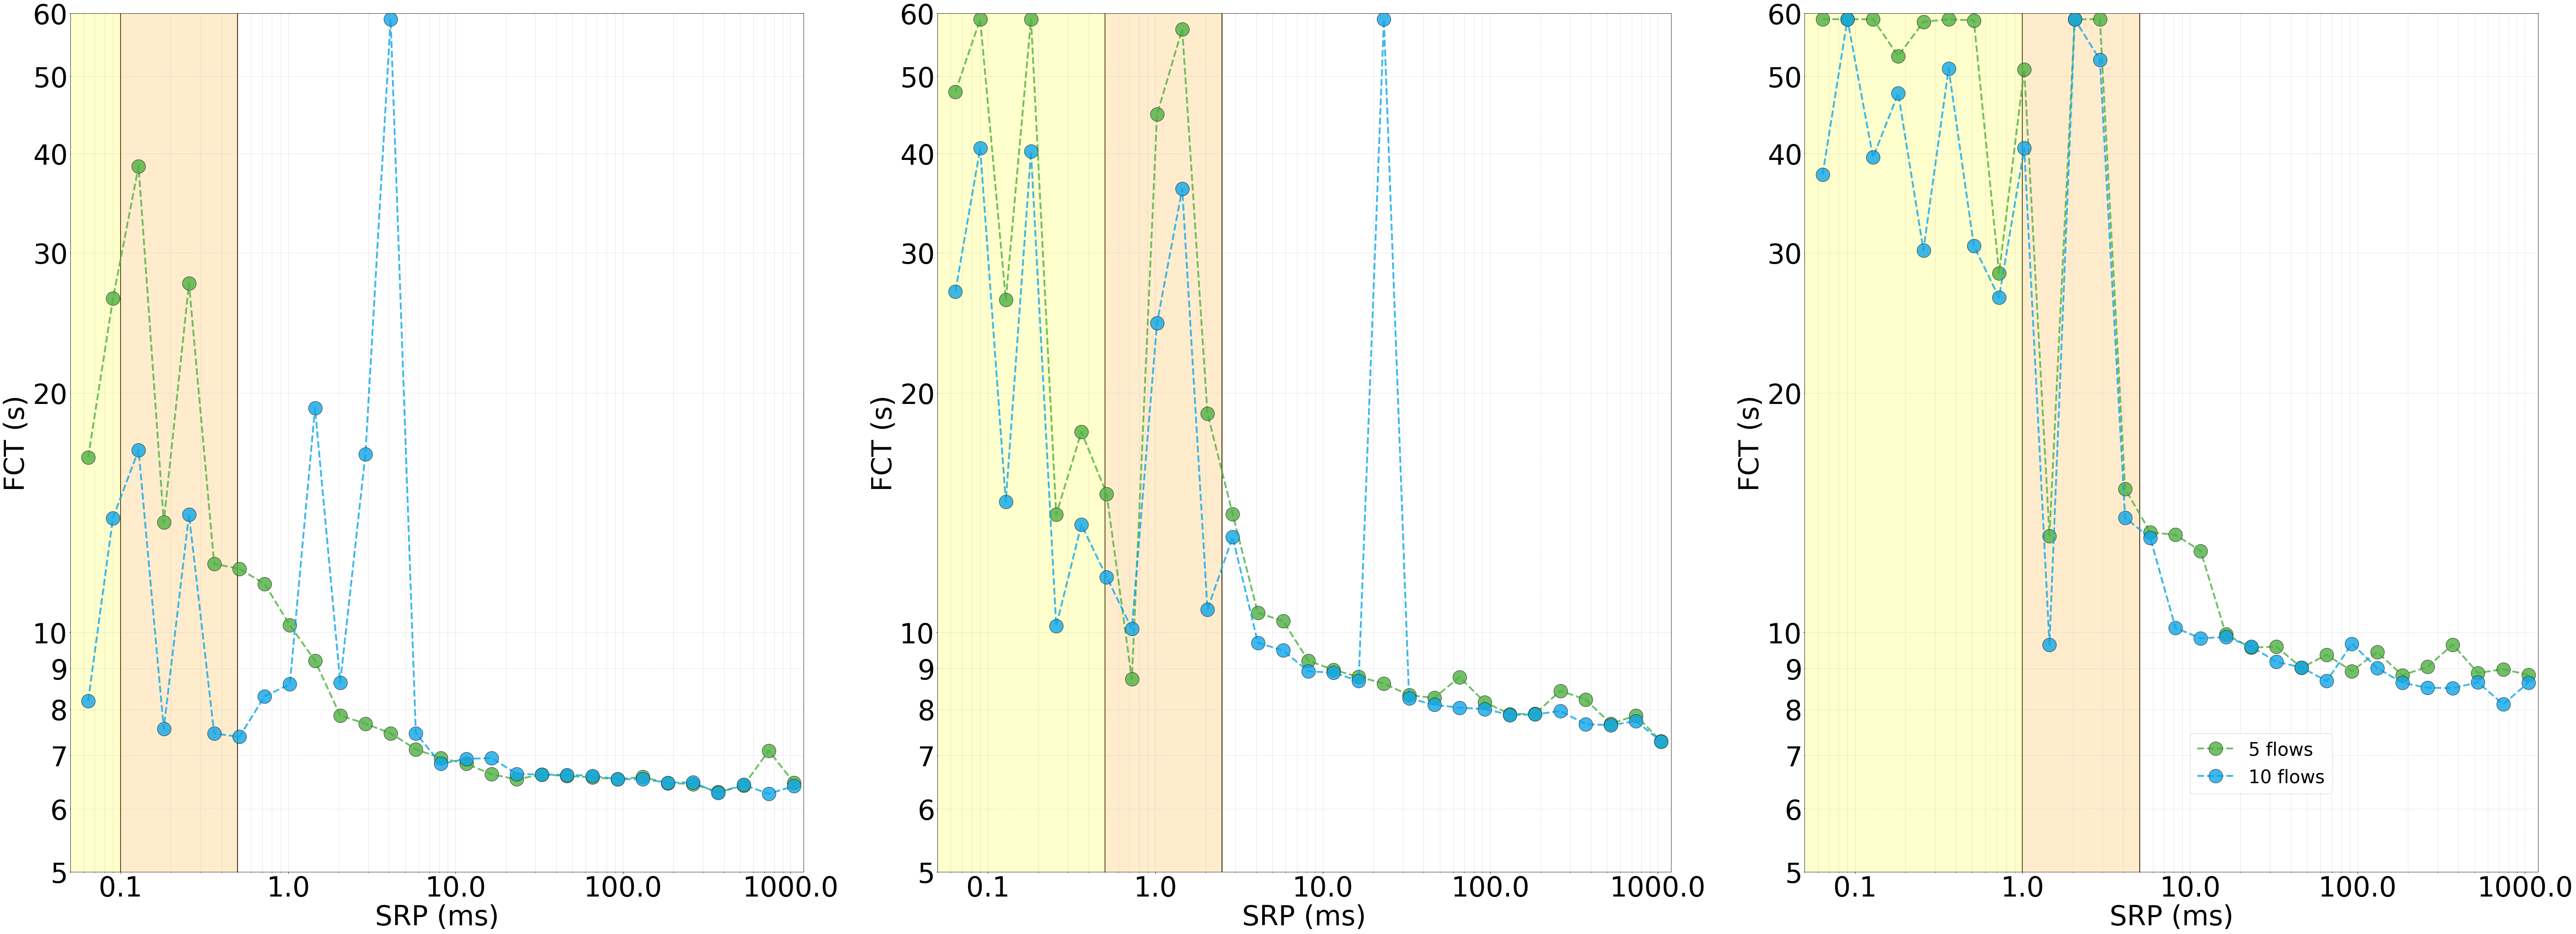

In [319]:
font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 60}
matplotlib.rc('font', **font)
all_ql = [100]
all_delay = [100, 500, 1000]
all_nflows = [5, 10]
pdp = "/home/wew168/ns0b05/log_changeboth_fixreorder1/pdata"
pdata = pd.read_csv(pdp, sep='\t', header=None, index_col=None,
                    names=['tstamp', 'srp', 'nflows', 'ql', 'delay', 'FCT', 'retrans', 'rto', 'some', 'syn', 'rtt'])

pavg = (pdata
        .groupby(['nflows', 'srp', 'ql', 'delay'], as_index=False)
        .agg({'FCT': np.min, 'retrans': np.min, 'rto': np.min, 'rtt': np.min, "syn": np.min})
       )
pavg['delay'] = pavg['delay'].apply(lambda x: int(x/2000))
pavg['FCT'] = pavg['FCT'].apply(lambda x: int(x-1000000))

pavg['FCT'] = pavg['FCT'].apply(lambda x: x/1000000)
pavg['srp'] = pavg['srp'].apply(lambda x: x/1e3)
fig = plt.figure()
ax = None
index = 0

for ql in all_ql:
    for delay in all_delay:
        ax = fig.add_subplot(len(all_ql), len(all_delay), index+1)
        plot_single(pavg, ql, delay, 'FCT', all_nflows, linewidth=4, linestyle="--", markersize=30, marker='o',
                    unit='s', ax=ax, xlower=0.050, xupper=1200, ylower=5, yupper=60, alpha=0.8, logy=True
#                   , color=(0x4d/0xff, 0xb0/0xff, 0x41/0xff, 1)
                    , pcolor=["#4db041", "#0fa5e8"]
                    , vlx=delay/1000, vshadecolor="yellow", vshadealpha=0.1
                    , vlx2=delay/1000*5, vshadecolor2="orange", vshadealpha2=0.1)
        index += 1
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.85, 0.15), fontsize=40, frameon=True, ncol=1)

fig.patch.set_facecolor('white')
fig.set_figheight(30)
fig.set_figwidth(80)
plt.tight_layout()
# plt.savefig('/home/wew168/plots/fctcurve.pdf') 
plt.show()


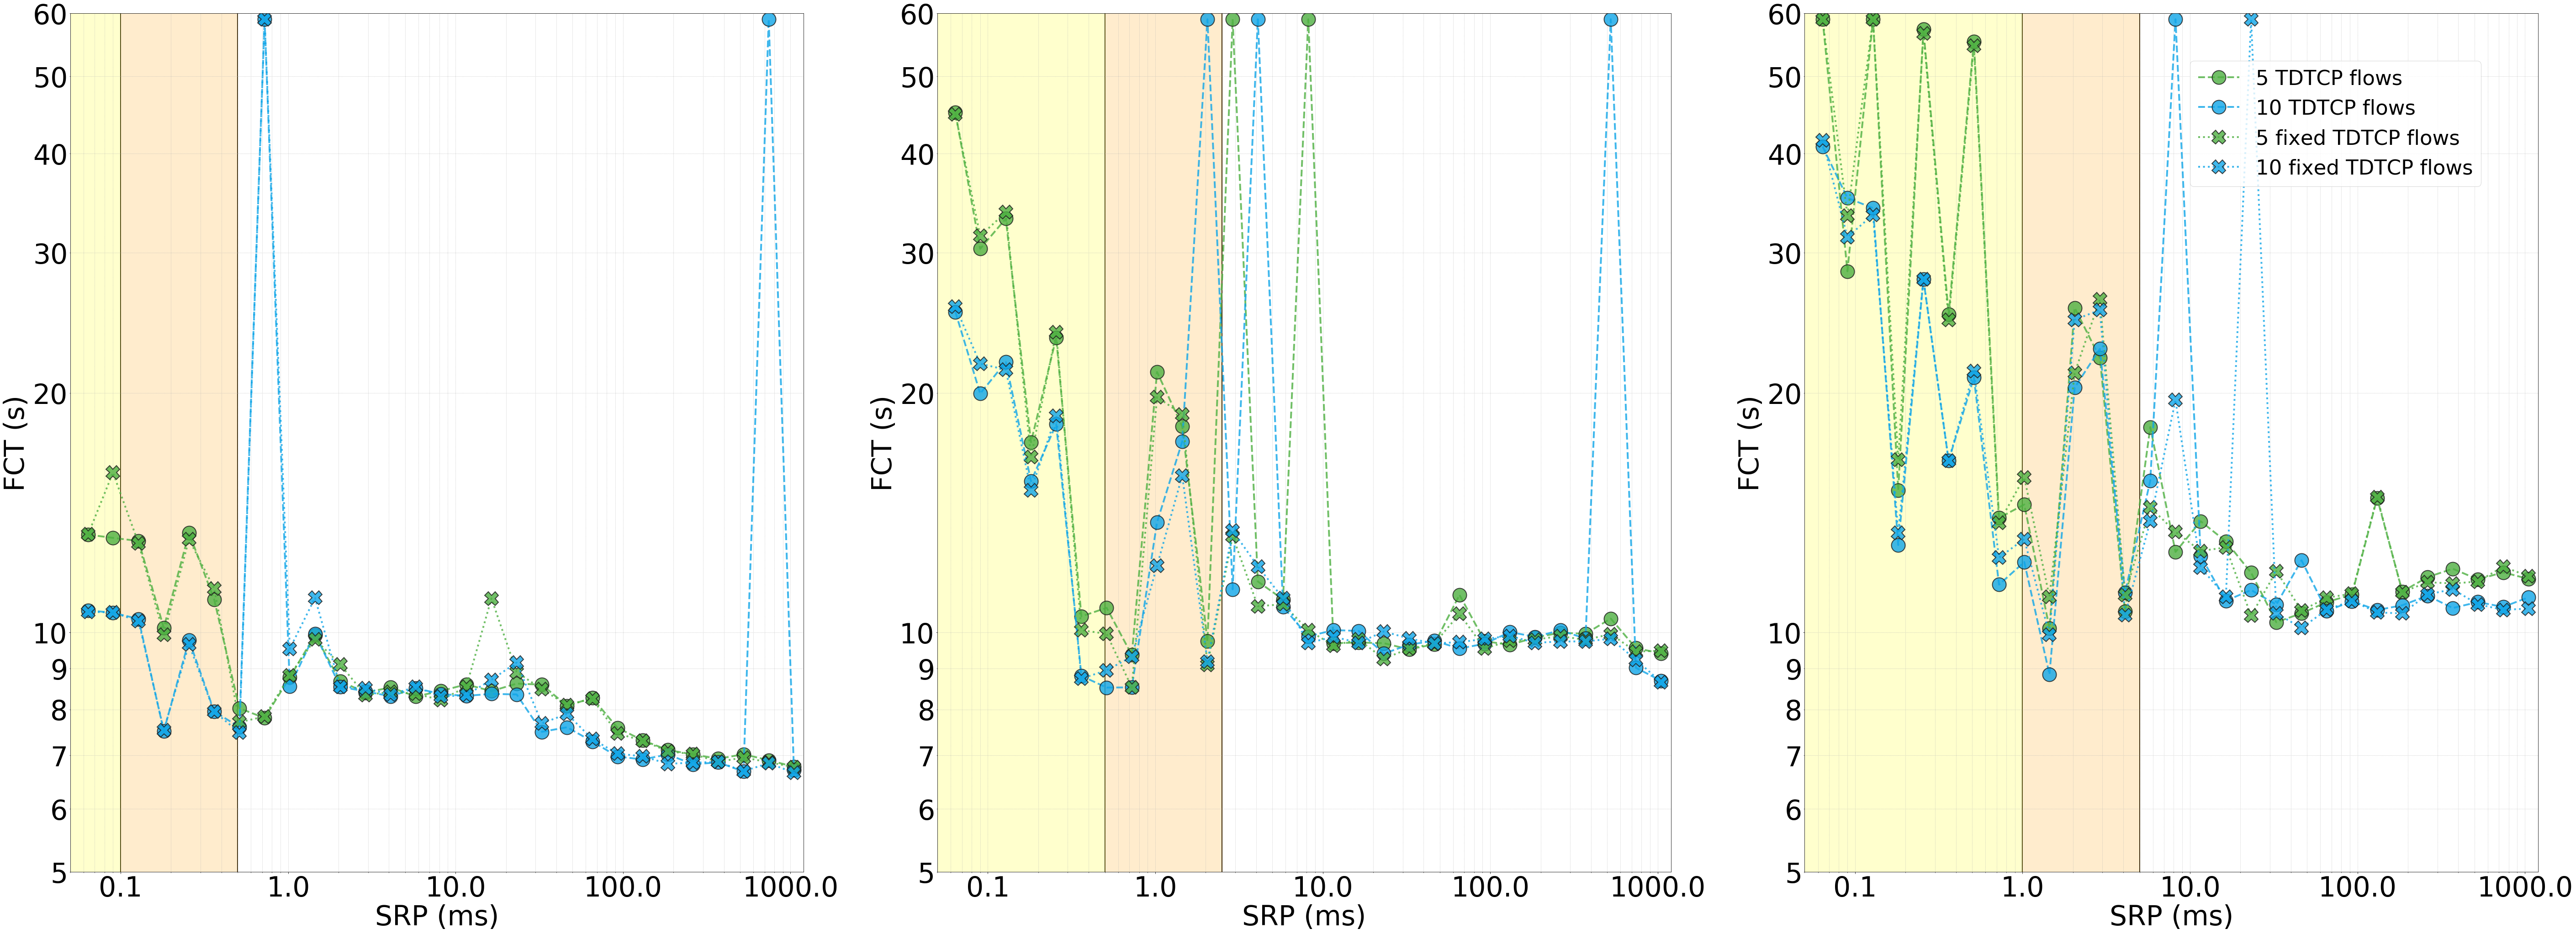

In [399]:
font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 60}
matplotlib.rc('font', **font)
all_ql = [100]
all_delay = [100, 500, 1000]
all_nflows = [5, 10]
# ptst = "~/final_logs/finalpdata/pdataCD"
# ptst = "/home/wew168/final_logs/finalpdata/pdataCBWTALL"
# psim = "/home/wew168/final_logs/finalpdata/pdataCBWBASE"
ptst = "/home/wew168/ns0b05/log_100ms64retr_cd1/pdata"
psim = "/home/wew168/final_logs/finalpdata/pdataCDT4"
# psim = "/home/wew168/ns1/ns-3.29/log_baseline_ddl_unordered/pdata"
pdt = pd.read_csv(ptst, sep='\t', header=None, index_col=None,
                    names=['tstamp', 'srp', 'nflows', 'ql', 'delay', 'FCT', 'retrans', 'rto', 'some', 'syn', 'rtt'])
pds = pd.read_csv(psim, sep='\t', header=None, index_col=None,
                    names=['tstamp', 'srp', 'nflows', 'ql', 'delay', 'FCT', 'retrans', 'rto', 'some', 'syn', 'rtt'])
pavt = (pdt
        .groupby(['nflows', 'srp', 'ql', 'delay'], as_index=False)
        .agg({'FCT': np.median, 'retrans': np.median, 'rto': np.median, 'rtt': np.median, "syn": np.median})
       )
pavs = (pds
        .groupby(['nflows', 'srp', 'ql', 'delay'], as_index=False)
        .agg({'FCT': np.median, 'retrans': np.median, 'rto': np.median, 'rtt': np.median, "syn": np.median})
       )

pavt['delay'] = pavt['delay'].apply(lambda x: int(x/2000))
pavs['delay'] = pavs['delay'].apply(lambda x: int(x/2000))

pavt['FCT'] = pavt['FCT'].apply(lambda x: x-1000000)
pavs['FCT'] = pavs['FCT'].apply(lambda x: x-1000000)

pavt['FCT'] = pavt['FCT'].apply(lambda x: x/1000000)
pavt['srp'] = pavt['srp'].apply(lambda x: x/1e3)
pavs['FCT'] = pavs['FCT'].apply(lambda x: x/1000000)
pavs['srp'] = pavs['srp'].apply(lambda x: x/1e3)

fig = plt.figure()
ax = None
index = 0
attr = 'FCT'
unit = 's'
for ql in all_ql:
    for delay in all_delay
        ax = fig.add_subplot(len(all_ql), len(all_delay), index+1)
        plot_single(pavs, ql, delay, attr, all_nflows, linewidth=4, linestyle="--", markersize=30, marker='o',
                    mew=2, alpha=0.8, unit=unit, ax=ax, xlower=0.050, xupper=1200, ylower=5, yupper=60, logy=True,
                    flowtype=" TDTCP", pcolor=["#4db041", "#0fa5e8"], #),color=(0x4d/0xff, 0xb0/0xff, 0x41/0xff, 1)
                    vlx=delay/1000, vshadecolor="yellow", vshadealpha=0.05,#)
                    vlx2=delay*5/1000, vshadecolor2="orange")
        plot_single(pavt, ql, delay, attr, all_nflows, linewidth=4, linestyle=":", markersize=30, marker='X', 
                    mew=2, alpha=0.8, unit=unit, ax=ax, xlower=0.050, xupper=1200, ylower=5, yupper=60,logy=True,
                    flowtype=" fixed TDTCP", pcolor=["#4db041", "#0fa5e8"], #mlabel="Numerical solver", color=(0,0,0,1)) ,color=(0x4d/0xff, 0xb0/0xff, 0x41/0xff, 1)
                    vlx=delay/1000, vshadecolor="yellow", vshadealpha=0.05, #)
                     vlx2=delay*5/1000, vshadecolor2="orange")
        index += 1
        
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.85, 0.8), frameon=True, ncol=1, fontsize=45)

fig.patch.set_facecolor('white')
fig.set_figheight(30)
fig.set_figwidth(80)
plt.tight_layout()

# change_bw_comparision
# change_both_unordered
# change_delay_unordered
# num_vs_sim_dyn_lat
# tcp_order_vs_unorder
# plt.savefig('/home/wew168/plots/change_bw_comparision.pdf')  
plt.show()

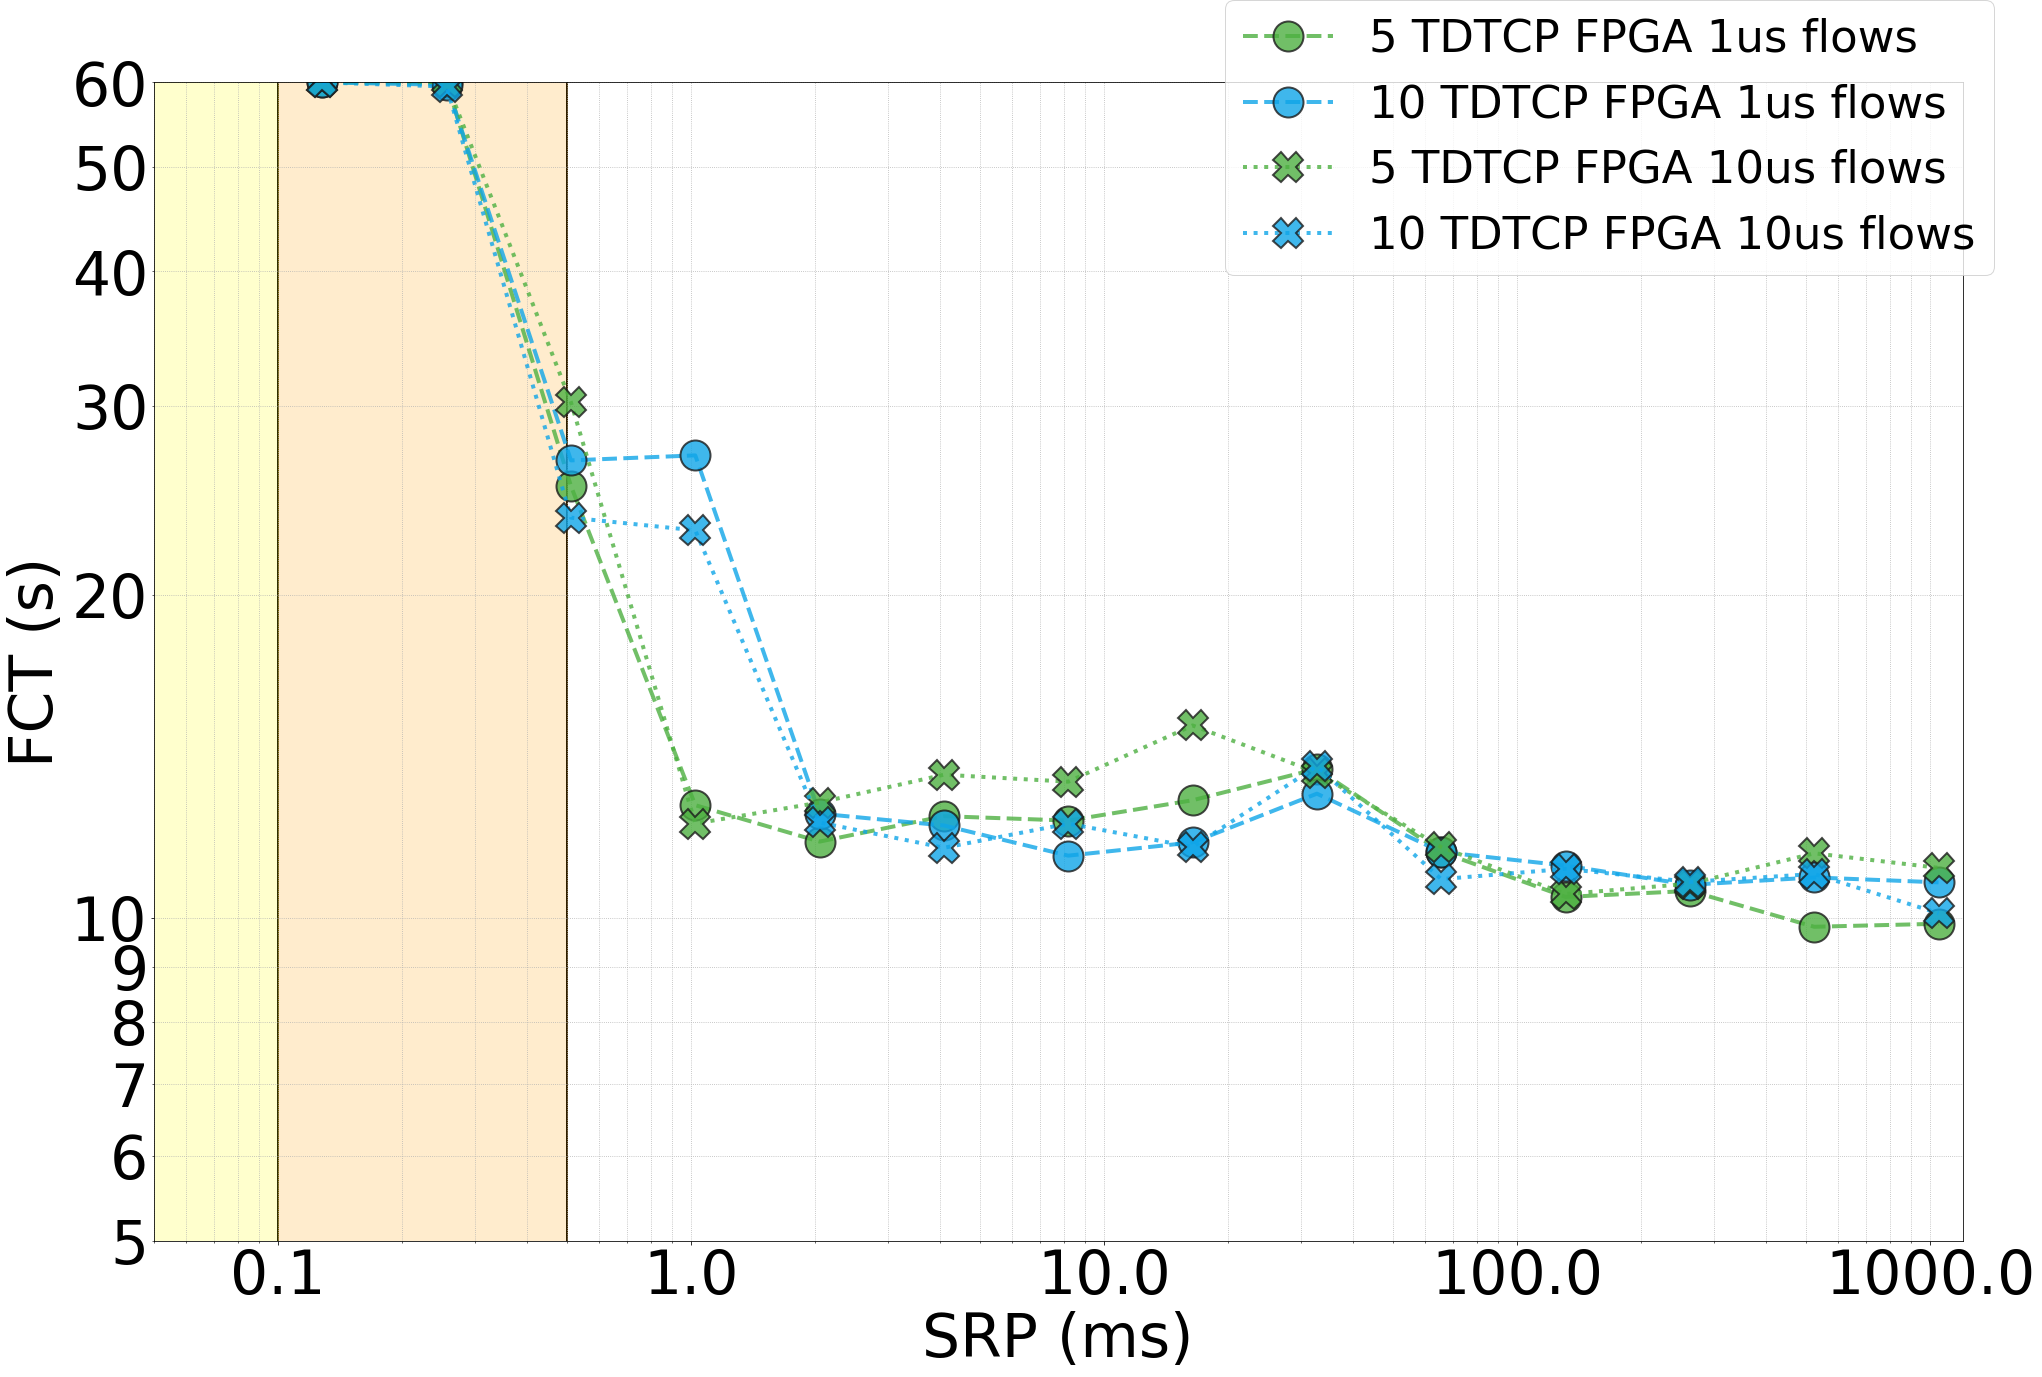

In [503]:
font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 60}
matplotlib.rc('font', **font)
all_ql = [100]
all_delay = [100]
all_nflows = [5, 10]
all_pre = [5, 10, 15, 20, 25]
# ptst = "~/final_logs/finalpdata/pdataCD"
# ptst = "/home/wew168/final_logs/finalpdata/pdataCBOTHTALL"
# psim = "/home/wew168/final_logs/finalpdata/pdataCBOTHBASEUNORDER"
ptst = "/home/wew168/log_tdtcp_postddl/log_cd_70runs/pdata"
psim = "/home/wew168/log_tdtcp_postddl/log_cd_70runs/pdata"
# psim = "/home/wew168/ns1/ns-3.29/log_baseline_ddl_unordered/pdata"
pdt = pd.read_csv(ptst, sep='\t', header=None, index_col=None,
                    names=['tstamp', 'srp', 'nflows', 'ql', 'delay', 'FCT', 'retrans', 'rto', 'syn', 'rtt', 'pre'])
pds = pd.read_csv(psim, sep='\t', header=None, index_col=None,
                    names=['tstamp', 'srp', 'nflows', 'ql', 'delay', 'FCT', 'retrans', 'rto', 'syn', 'rtt', 'pre'])
pre = 10
pdt = pdt[pdt['pre']==pre]
pds = pds[pds['pre']==1]
pavt = (pdt
        .groupby(['nflows', 'srp', 'ql', 'delay'], as_index=False)
        .agg({'FCT': np.mean, 'retrans': np.median, 'rto': np.median, 'rtt': np.median, "syn": np.median})
       )
pavs = (pds
        .groupby(['nflows', 'srp', 'ql', 'delay'], as_index=False)
        .agg({'FCT': np.mean, 'retrans': np.median, 'rto': np.median, 'rtt': np.median, "syn": np.median})
       )

pavt['delay'] = pavt['delay'].apply(lambda x: int(x/2))
pavs['delay'] = pavs['delay'].apply(lambda x: int(x/2))

# pavt['FCT'] = pavt['FCT'].apply(lambda x: x-1000000)
# pavs['FCT'] = pavs['FCT'].apply(lambda x: x-1000000)

pavt['FCT'] = pavt['FCT'].apply(lambda x: x/1000000)
pavt['srp'] = pavt['srp'].apply(lambda x: x/1e3)
pavs['FCT'] = pavs['FCT'].apply(lambda x: x/1000000)
pavs['srp'] = pavs['srp'].apply(lambda x: x/1e3)

fig = plt.figure()
ax = None
index = 0
attr = 'FCT'
unit = 's'
for ql in all_ql:
    for delay in all_delay:
        ax = fig.add_subplot(len(all_ql), len(all_delay), index+1)
        plot_single(pavs, ql, delay, attr, all_nflows, ncolors=3, linewidth=4, linestyle="--", markersize=30, marker='o',
                    mew=2, alpha=0.8, unit=unit, ax=ax, xlower=0.050, xupper=1200, ylower=5, yupper=60, logy=True,
                    flowtype=" TDTCP FPGA 1us", pcolor=["#4db041", "#0fa5e8"]#, color=(0x4d/0xff, 0xb0/0xff, 0x41/0xff, 1) #)
                    ,vlx=delay/1000, vshadecolor="yellow", vshadealpha=0.05#)
                    ,vlx2=delay*5/1000, vshadecolor2="orange")
        plot_single(pavt, ql, delay, attr, all_nflows, linewidth=4, linestyle=":", markersize=30, marker='X', 
                    mew=2, alpha=0.8, unit=unit, ax=ax, xlower=0.050, xupper=1200, ylower=5, yupper=60,logy=True,
                    flowtype=" TDTCP FPGA "+str(pre)+"us", pcolor=["#4db041", "#0fa5e8"]#, color=(0x4d/0xff, 0xb0/0xff, 0x41/0xff, 1), #mlabel="Numerical solver", color=(0,0,0,1))
                    ,vlx=delay/1000, vshadecolor="yellow", vshadealpha=0.05#)
                    ,vlx2=delay*5/1000, vshadecolor2="orange")
        index += 1
        
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.6, 0.8), frameon=True, ncol=1, fontsize=45)

fig.patch.set_facecolor('white')
fig.set_figheight(20)
fig.set_figwidth(30)
plt.tight_layout()

# change_bw_comparision
# change_both_unordered
# change_delay_unordered
# num_vs_sim_dyn_lat
# tcp_order_vs_unorder
plt.savefig('/home/wew168/plots/change_bw_comparision.pdf')  
plt.show()

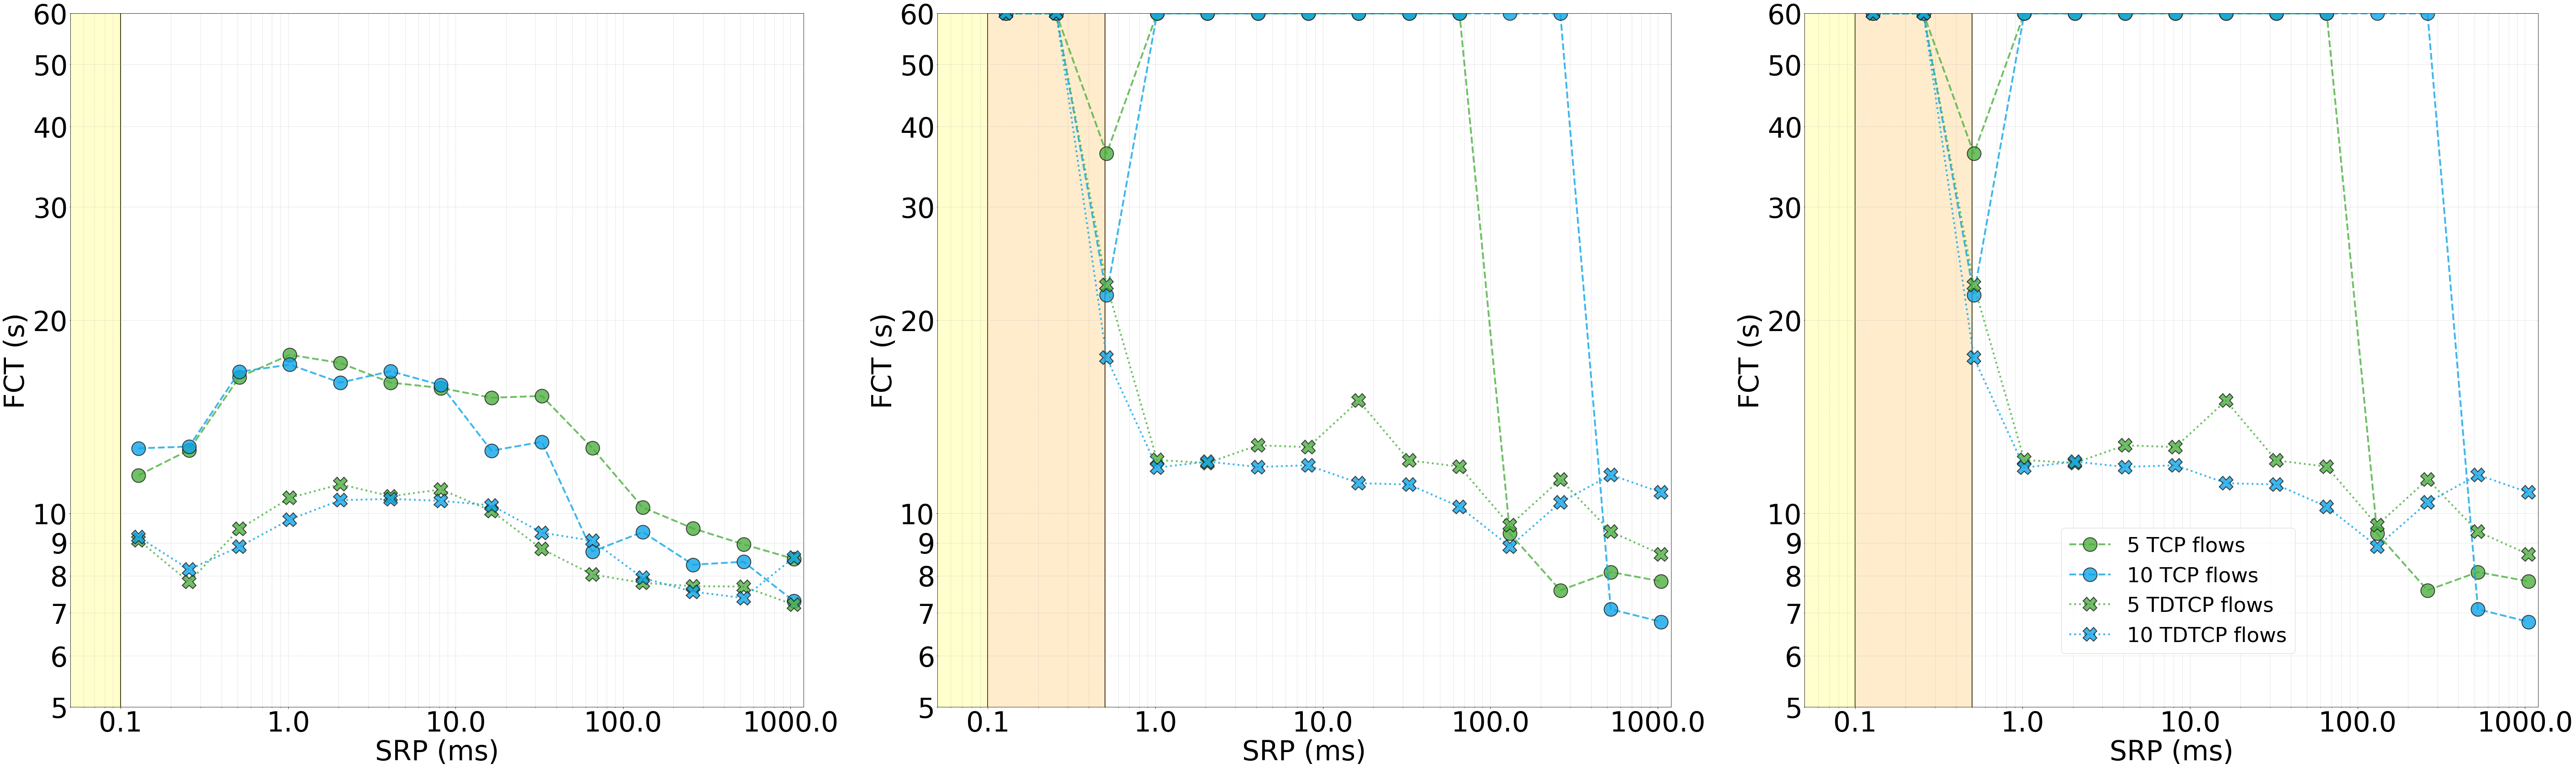

In [419]:
font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 60}
matplotlib.rc('font', **font)
all_ql = [100]
all_delay = [100]
all_nflows = [5, 10]
# ptst = "~/final_logs/finalpdata/pdataCD"
# ptst = "/home/wew168/final_logs/finalpdata/pdataCBOTHTALL"
# psim = "/home/wew168/final_logs/finalpdata/pdataCBOTHBASEUNORDER"
ql=100
delay=100
ptst = "/home/wew168/log_tdtcp_postddl/cbw_0us_1/pdata"
psim = "/home/wew168/log_mtcp_postddl/cbw_5us/pdata"
# psim = "/home/wew168/ns1/ns-3.29/log_baseline_ddl_unordered/pdata"
pdt = pd.read_csv(ptst, sep='\t', header=None, index_col=None,
                    names=['tstamp', 'srp', 'nflows', 'ql', 'delay', 'FCT', 'retrans', 'rto', 'syn', 'rtt'])
pds = pd.read_csv(psim, sep='\t', header=None, index_col=None,
                    names=['tstamp', 'srp', 'nflows', 'ql', 'delay', 'FCT', 'retrans', 'rto', 'syn', 'rtt'])
pavt = (pdt
        .groupby(['nflows', 'srp', 'ql', 'delay'], as_index=False)
        .agg({'FCT': np.max, 'retrans': np.median, 'rto': np.median, 'rtt': np.median, "syn": np.median})
       )
pavs = (pds
        .groupby(['nflows', 'srp', 'ql', 'delay'], as_index=False)
        .agg({'FCT': np.median, 'retrans': np.median, 'rto': np.median, 'rtt': np.median, "syn": np.median})
       )

pavt['delay'] = pavt['delay'].apply(lambda x: int(x/2))
pavs['delay'] = pavs['delay'].apply(lambda x: int(x/2))

# pavt['FCT'] = pavt['FCT'].apply(lambda x: x-1000000)
# pavs['FCT'] = pavs['FCT'].apply(lambda x: x-1000000)

pavt['FCT'] = pavt['FCT'].apply(lambda x: x/1000000)
pavt['srp'] = pavt['srp'].apply(lambda x: x/1e3)
pavs['FCT'] = pavs['FCT'].apply(lambda x: x/1000000)
pavs['srp'] = pavs['srp'].apply(lambda x: x/1e3)

fig = plt.figure()
ax = None
index = 0
attr = 'FCT'
unit = 's'

ax = fig.add_subplot(1, 3, index+1)
plot_single(pavs, ql, delay, attr, all_nflows, ncolors=3, linewidth=4, linestyle="--", markersize=30, marker='o',
            mew=2, alpha=0.8, unit=unit, ax=ax, xlower=0.050, xupper=1200, ylower=5, yupper=60, logy=True,
            flowtype=" TCP", pcolor=["#4db041", "#0fa5e8"], #color=(0x4d/0xff, 0xb0/0xff, 0x41/0xff, 1))
            vlx=delay/1000, vshadecolor="yellow", vshadealpha=0.05)
            #,vlx2=delay*5/1000, vshadecolor2="orange")
plot_single(pavt, ql, delay, attr, all_nflows, linewidth=4, linestyle=":", markersize=30, marker='X', 
            mew=2, alpha=0.8, unit=unit, ax=ax, xlower=0.050, xupper=1200, ylower=5, yupper=60,logy=True,
            flowtype=" TDTCP", pcolor=["#4db041", "#0fa5e8"], #mlabel="Numerical solver", color=(0,0,0,1))
            vlx=delay/1000, vshadecolor="yellow", vshadealpha=0.05)
            #,vlx2=delay*5/1000, vshadecolor2="orange")
index += 1

ptst = "/home/wew168/log_tdtcp_postddl/cboth_0us_1/pdata"
psim = "/home/wew168/log_mtcp_postddl/cboth_5us/pdata"
pdt = pd.read_csv(ptst, sep='\t', header=None, index_col=None,
                    names=['tstamp', 'srp', 'nflows', 'ql', 'delay', 'FCT', 'retrans', 'rto', 'syn', 'rtt'])
pds = pd.read_csv(psim, sep='\t', header=None, index_col=None,
                    names=['tstamp', 'srp', 'nflows', 'ql', 'delay', 'FCT', 'retrans', 'rto', 'syn', 'rtt'])
pavt = (pdt
        .groupby(['nflows', 'srp', 'ql', 'delay'], as_index=False)
        .agg({'FCT': np.max, 'retrans': np.median, 'rto': np.median, 'rtt': np.median, "syn": np.median})
       )
pavs = (pds
        .groupby(['nflows', 'srp', 'ql', 'delay'], as_index=False)
        .agg({'FCT': np.median, 'retrans': np.median, 'rto': np.median, 'rtt': np.median, "syn": np.median})
       )

pavt['delay'] = pavt['delay'].apply(lambda x: int(x/2))
pavs['delay'] = pavs['delay'].apply(lambda x: int(x/2))

pavt['FCT'] = pavt['FCT'].apply(lambda x: x/1000000)
pavt['srp'] = pavt['srp'].apply(lambda x: x/1e3)
pavs['FCT'] = pavs['FCT'].apply(lambda x: x/1000000)
pavs['srp'] = pavs['srp'].apply(lambda x: x/1e3)

ax = fig.add_subplot(1, 3, index+1)
plot_single(pavs, ql, delay, attr, all_nflows, ncolors=3, linewidth=4, linestyle="--", markersize=30, marker='o',
            mew=2, alpha=0.8, unit=unit, ax=ax, xlower=0.050, xupper=1200, ylower=5, yupper=60, logy=True,
            flowtype=" TCP", pcolor=["#4db041", "#0fa5e8"], #color=(0x4d/0xff, 0xb0/0xff, 0x41/0xff, 1))
            vlx=delay/1000, vshadecolor="yellow", vshadealpha=0.05
            ,vlx2=delay*5/1000, vshadecolor2="orange")
plot_single(pavt, ql, delay, attr, all_nflows, linewidth=4, linestyle=":", markersize=30, marker='X', 
            mew=2, alpha=0.8, unit=unit, ax=ax, xlower=0.050, xupper=1200, ylower=5, yupper=60,logy=True,
            flowtype=" TDTCP", pcolor=["#4db041", "#0fa5e8"], #mlabel="Numerical solver", color=(0,0,0,1))
            vlx=delay/1000, vshadecolor="yellow", vshadealpha=0.05
            ,vlx2=delay*5/1000, vshadecolor2="orange")
index += 1

ptst = "/home/wew168/log_tdtcp_postddl/cboth_0us_1/pdata"
psim = "/home/wew168/log_mtcp_postddl/cboth_5us/pdata"
pdt = pd.read_csv(ptst, sep='\t', header=None, index_col=None,
                    names=['tstamp', 'srp', 'nflows', 'ql', 'delay', 'FCT', 'retrans', 'rto', 'syn', 'rtt'])
pds = pd.read_csv(psim, sep='\t', header=None, index_col=None,
                    names=['tstamp', 'srp', 'nflows', 'ql', 'delay', 'FCT', 'retrans', 'rto', 'syn', 'rtt'])
pavt = (pdt
        .groupby(['nflows', 'srp', 'ql', 'delay'], as_index=False)
        .agg({'FCT': np.max, 'retrans': np.median, 'rto': np.median, 'rtt': np.median, "syn": np.median})
       )
pavs = (pds
        .groupby(['nflows', 'srp', 'ql', 'delay'], as_index=False)
        .agg({'FCT': np.median, 'retrans': np.median, 'rto': np.median, 'rtt': np.median, "syn": np.median})
       )

pavt['delay'] = pavt['delay'].apply(lambda x: int(x/2))
pavs['delay'] = pavs['delay'].apply(lambda x: int(x/2))

pavt['FCT'] = pavt['FCT'].apply(lambda x: x/1000000)
pavt['srp'] = pavt['srp'].apply(lambda x: x/1e3)
pavs['FCT'] = pavs['FCT'].apply(lambda x: x/1000000)
pavs['srp'] = pavs['srp'].apply(lambda x: x/1e3)


ax = fig.add_subplot(1, 3, index+1)
plot_single(pavs, ql, delay, attr, all_nflows, ncolors=3, linewidth=4, linestyle="--", markersize=30, marker='o',
            mew=2, alpha=0.8, unit=unit, ax=ax, xlower=0.050, xupper=1200, ylower=5, yupper=60, logy=True,
            flowtype=" TCP", pcolor=["#4db041", "#0fa5e8"], #color=(0x4d/0xff, 0xb0/0xff, 0x41/0xff, 1))
            vlx=delay/1000, vshadecolor="yellow", vshadealpha=0.05
            ,vlx2=delay*5/1000, vshadecolor2="orange")
plot_single(pavt, ql, delay, attr, all_nflows, linewidth=4, linestyle=":", markersize=30, marker='X', 
            mew=2, alpha=0.8, unit=unit, ax=ax, xlower=0.050, xupper=1200, ylower=5, yupper=60,logy=True,
            flowtype=" TDTCP", pcolor=["#4db041", "#0fa5e8"], #mlabel="Numerical solver", color=(0,0,0,1))
            vlx=delay/1000, vshadecolor="yellow", vshadealpha=0.05
            ,vlx2=delay*5/1000, vshadecolor2="orange")
index += 1
        
        
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.8, 0.15), frameon=True, ncol=1, fontsize=45)

fig.patch.set_facecolor('white')
fig.set_figheight(25)
fig.set_figwidth(80)
plt.tight_layout()

# change_bw_comparision
# change_both_unordered
# change_delay_unordered
# num_vs_sim_dyn_lat
# tcp_order_vs_unorder
plt.savefig('/home/wew168/plots/testbed.pdf')  
plt.show()

In [230]:
sns.color_palette("husl", 3)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744)]

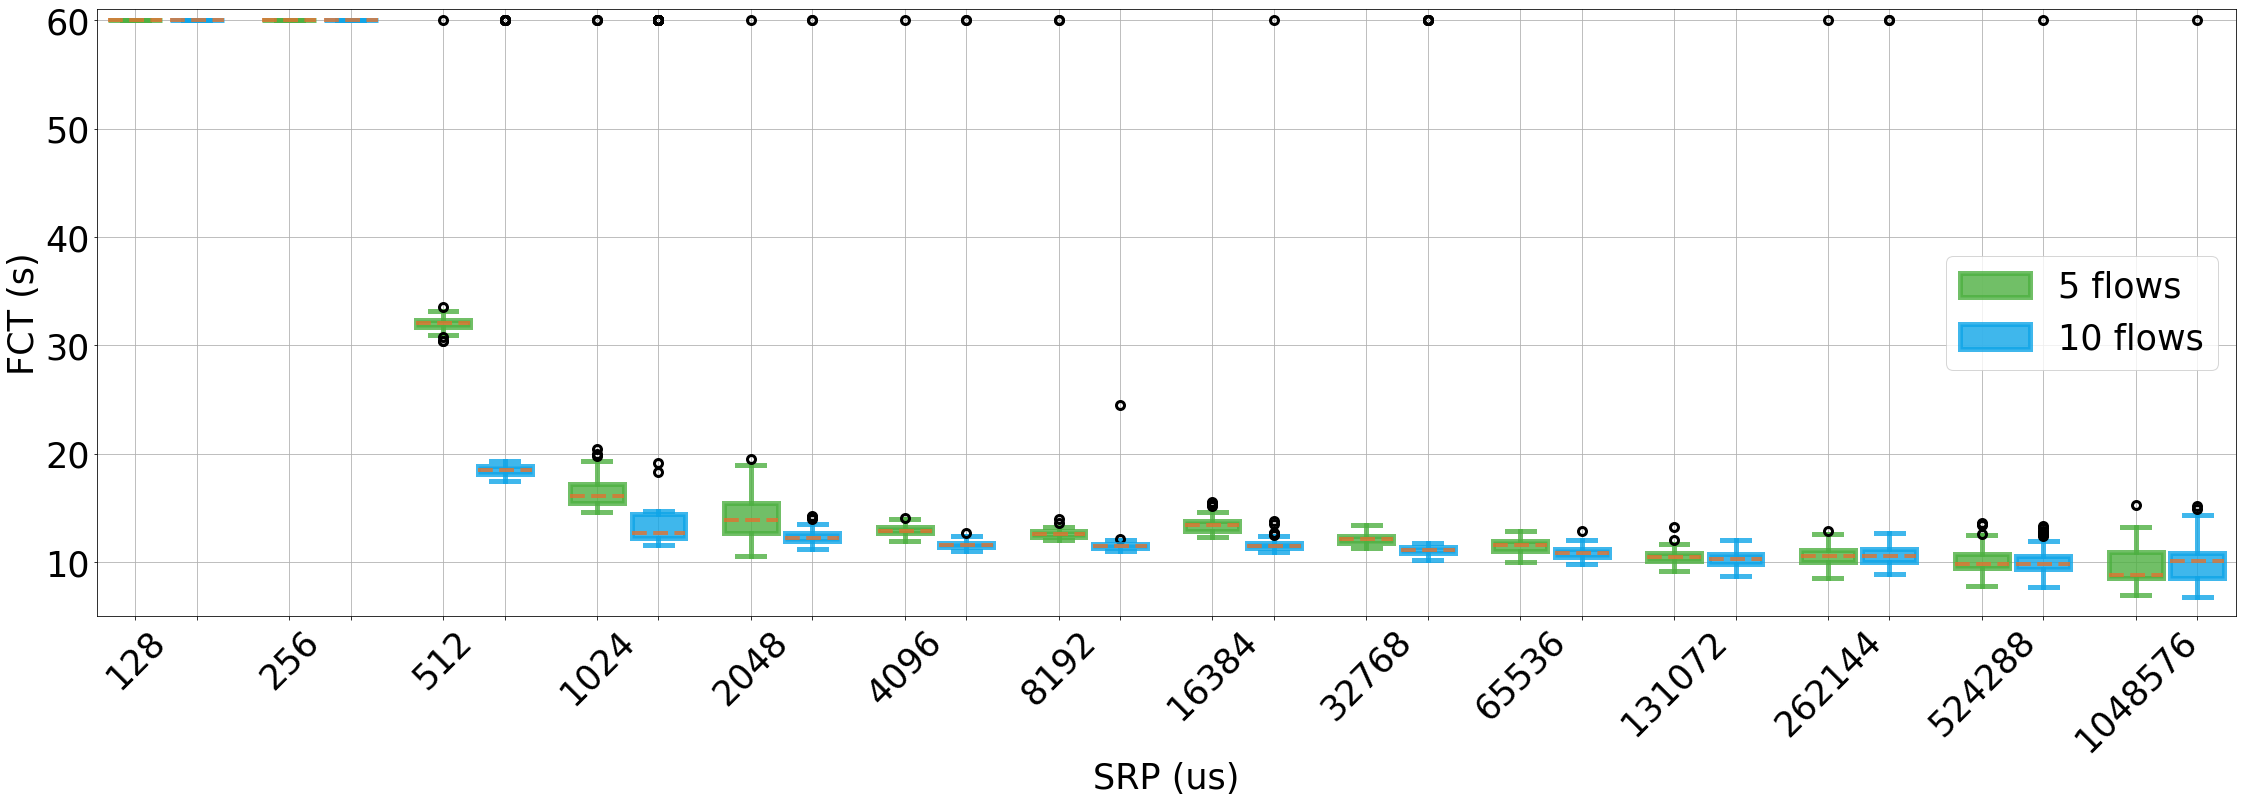

In [628]:
font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 35}
matplotlib.rc('font', **font)
ptst = "/home/wew168/log_tdtcp_postddl/log_cboth_100runs/pdata"
pdt = pd.read_csv(ptst, sep='\t', header=None, index_col=None,
                    names=['tstamp', 'srp', 'nflows', 'ql', 'delay', 'FCT', 'retrans', 'rto', 'syn', 'rtt', 'pre'])
pdt['FCT'] = pdt['FCT'].apply(lambda x: x/1000000)
df = pdt
alldl = [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576]
# allpre = [1, 5, 10, 15, 20]
p = 20
allnflows = [5, 10]
allbox = []
for n in allnflows:
    nfb = []
    for d in alldl:
    #     for p in allpre:
        sdf = df[(df['pre']==p)&(df['srp']==d)&(df['nflows']==n)]
        nfb.append(sdf['FCT'])
    allbox.append(nfb)
fig7, ax7 = plt.subplots()
# ax7.set_title('Change Both, pre-send='+str(p)+'us')
bp5 = ax7.boxplot(allbox[0], widths=0.7,positions=np.array(range(len(allbox[0])))*2.0-0.4,patch_artist=True)
bp10 = ax7.boxplot(allbox[1], widths=0.7,positions=np.array(range(len(allbox[1])))*2.0+0.4,patch_artist=True)
color5=(0x4d/0xff, 0xb0/0xff, 0x41/0xff, 0.8)
color10=(0x0f/0xff, 0xa5/0xff, 0xe8/0xff, 0.8)
# color=(0x4d/0xff, 0xb0/0xff, 0x41/0xff, 1)
mcolor=(0xe0/0xff, 0x73/0xff, 0x30/0xff, 0.8)
for box in bp5['boxes']:
    # change outline color
    box.set( color=color, facecolor=color, linewidth=5)
    
## change color and linewidth of the whiskers
for whisker in bp5['whiskers']:
    whisker.set(color=color5, linewidth=5)

## change color and linewidth of the caps
for cap in bp5['caps']:
    cap.set(color=color5, linewidth=5)

## change color and linewidth of the medians
for median in bp5['medians']:
    median.set(color=mcolor, linewidth=4, linestyle="dashed")

## change the style of fliers and their fill
for flier in bp5['fliers']:
    flier.set(marker='o', color='#000000', alpha=1, markersize=8, markeredgewidth=3)

for box in bp10['boxes']:
    # change outline color
    box.set( color=color10, facecolor=color, linewidth=5)
    
## change color and linewidth of the whiskers
for whisker in bp10['whiskers']:
    whisker.set(color=color10, linewidth=5)

## change color and linewidth of the caps
for cap in bp10['caps']:
    cap.set(color=color10, linewidth=5)

## change color and linewidth of the medians
for median in bp10['medians']:
    median.set(color=mcolor, linewidth=4, linestyle="dashed")

## change the style of fliers and their fill
for flier in bp10['fliers']:
    flier.set(marker='o', color='#000000', alpha=1, markersize=8, markeredgewidth=3)
                 
ax7.set_ylabel('FCT (s)')
ax7.set_xlabel('SRP (us)')
# ax7.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.1f'))
ax7.set_xticklabels(alldl)
plt.xticks(rotation=45)
ax7.grid(zorder=0)
ax7.set_ylim(5, 61)
ax7.legend([bp5["boxes"][0], bp10["boxes"][0]], ['5 flows', '10 flows'], loc='right')
fig7.set_figheight(12)
fig7.set_figwidth(32)
plt.tight_layout()
plt.savefig('/home/wew168/plots/cboth_pre'+str(p)+'us.pdf') 
plt.show()

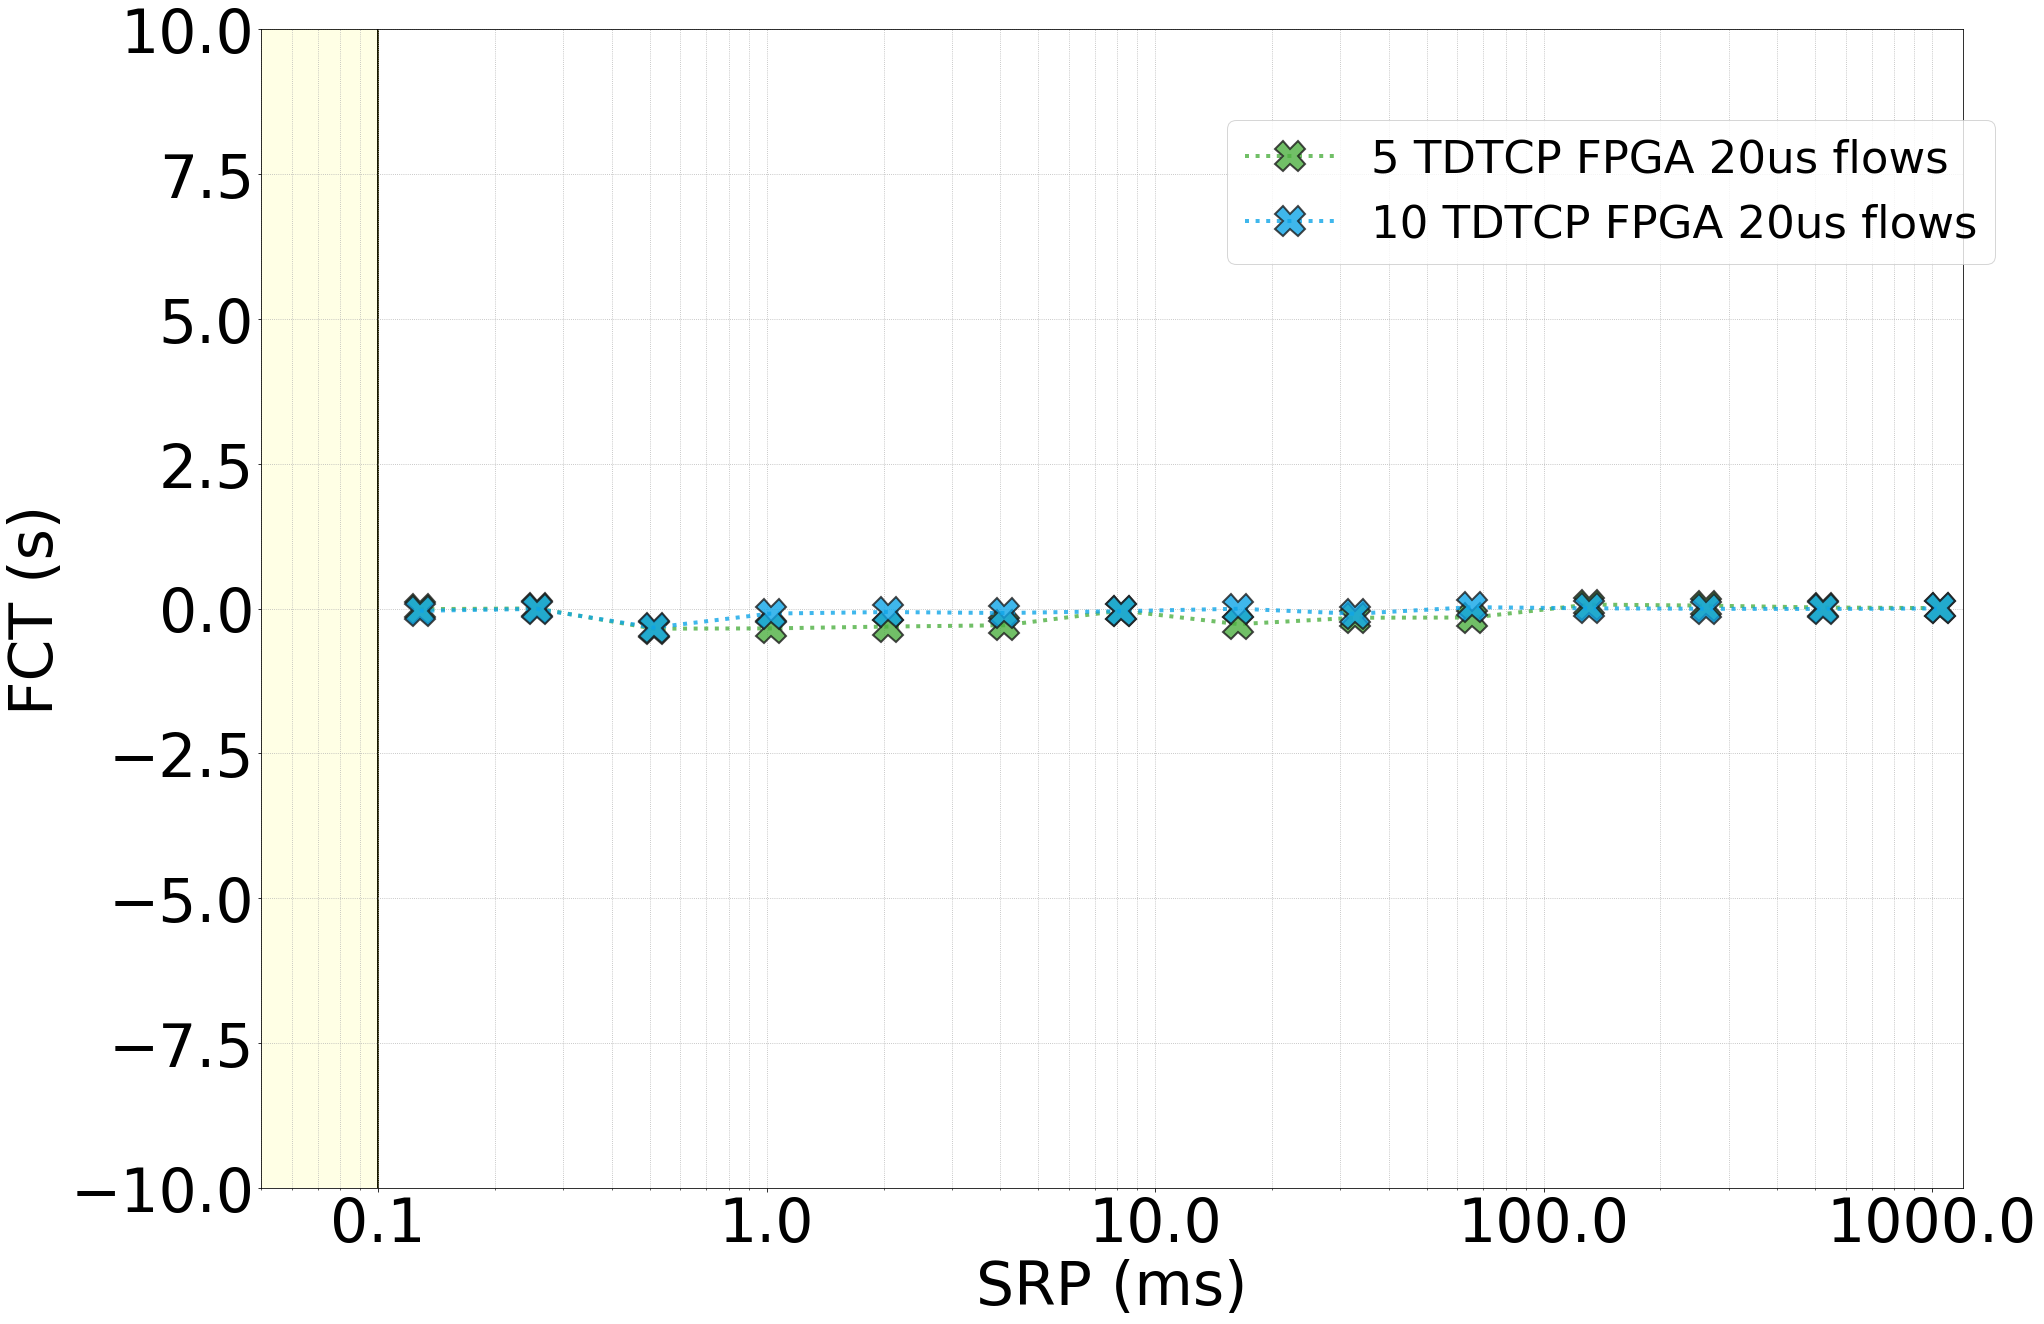

In [623]:
font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 60}
matplotlib.rc('font', **font)
all_ql = [100]
all_delay = [100]
all_nflows = [5, 10]
all_pre = [5, 10, 15, 20, 25]
# ptst = "~/final_logs/finalpdata/pdataCD"
# ptst = "/home/wew168/final_logs/finalpdata/pdataCBOTHTALL"
# psim = "/home/wew168/final_logs/finalpdata/pdataCBOTHBASEUNORDER"
ptst = "/home/wew168/log_tdtcp_postddl/log_cbw_100runs/pdata"
psim = "/home/wew168/log_tdtcp_postddl/log_cbw_100runs/pdata"
# psim = "/home/wew168/ns1/ns-3.29/log_baseline_ddl_unordered/pdata"
pdt = pd.read_csv(ptst, sep='\t', header=None, index_col=None,
                    names=['tstamp', 'srp', 'nflows', 'ql', 'delay', 'FCT', 'retrans', 'rto', 'syn', 'rtt', 'pre'])
pds = pd.read_csv(psim, sep='\t', header=None, index_col=None,
                    names=['tstamp', 'srp', 'nflows', 'ql', 'delay', 'FCT', 'retrans', 'rto', 'syn', 'rtt', 'pre'])
pre = 20
pdt = pdt[pdt['pre']==pre]
pds = pds[pds['pre']==1]
pavt = (pdt
        .groupby(['nflows', 'srp', 'ql', 'delay'], as_index=False)
        .agg({'FCT': np.median, 'retrans': np.median, 'rto': np.median, 'rtt': np.median, "syn": np.median})
       )
pavs = (pds
        .groupby(['nflows', 'srp', 'ql', 'delay'], as_index=False)
        .agg({'FCT': np.median, 'retrans': np.median, 'rto': np.median, 'rtt': np.median, "syn": np.median})
       )

pavt['delay'] = pavt['delay'].apply(lambda x: int(x/2))
pavs['delay'] = pavs['delay'].apply(lambda x: int(x/2))

# pavt['FCT'] = pavt['FCT'].apply(lambda x: x-1000000)
# pavs['FCT'] = pavs['FCT'].apply(lambda x: x-1000000)

pavt['FCT'] = pavt['FCT'].apply(lambda x: x/1000000)
pavt['srp'] = pavt['srp'].apply(lambda x: x/1e3)
pavs['FCT'] = pavs['FCT'].apply(lambda x: x/1000000)
pavs['srp'] = pavs['srp'].apply(lambda x: x/1e3)

for entry, row in pavt.iterrows():
#     print()
    pavt.at[entry,'FCT'] -= pavs[(pavs['srp']==row['srp'])&(pavs['nflows']==row['nflows'])]['FCT'].values[0]
    
fig = plt.figure()
ax = None
index = 0
attr = 'FCT'
unit = 's'
for ql in all_ql:
    for delay in all_delay:
        ax = fig.add_subplot(len(all_ql), len(all_delay), index+1)
#         plot_single(pavs, ql, delay, attr, all_nflows, ncolors=3, linewidth=4, linestyle="--", markersize=30, marker='o',
#                     mew=2, alpha=0.8, unit=unit, ax=ax, xlower=0.050, xupper=1200, ylower=5, yupper=60, logy=True,
#                     flowtype=" TDTCP FPGA 1us", pcolor=["#4db041", "#0fa5e8"]#, color=(0x4d/0xff, 0xb0/0xff, 0x41/0xff, 1) #)
#                     ,vlx=delay/1000, vshadecolor="yellow", vshadealpha=0.05#)
#                     ,vlx2=delay*5/1000, vshadecolor2="orange")
        plot_single(pavt, ql, delay, attr, all_nflows, linewidth=4, linestyle=":", markersize=30, marker='X', 
                    mew=2, alpha=0.8, unit=unit, ax=ax, xlower=0.050, xupper=1200, ylower=-10, yupper=10,#logy=True,
                    flowtype=" TDTCP FPGA "+str(pre)+"us", pcolor=["#4db041", "#0fa5e8"]#, color=(0x4d/0xff, 0xb0/0xff, 0x41/0xff, 1), #mlabel="Numerical solver", color=(0,0,0,1))
                    ,vlx=delay/1000, vshadecolor="yellow", vshadealpha=0.05)
#                     ,vlx2=delay*5/1000, vshadecolor2="orange")
        index += 1
        
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.6, 0.8), frameon=True, ncol=1, fontsize=45)

fig.patch.set_facecolor('white')
fig.set_figheight(20)
fig.set_figwidth(30)
plt.tight_layout()

# change_bw_comparision
# change_both_unordered
# change_delay_unordered
# num_vs_sim_dyn_lat
# tcp_order_vs_unorder
plt.savefig('/home/wew168/plots/change_bw_comparision.pdf')  
plt.show()